In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 
import statsmodels as sm
%pylab inline
#%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [2]:
car_sales = pd.read_csv('Car_sales.csv')

In [3]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.8+ KB


In [4]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
car_sales.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [6]:
car_sales.dtypes

Manufacturer               object
Model                      object
Sales_in_thousands        float64
four_year_resale_value    float64
Vehicle_type               object
Price_in_thousands        float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Latest_Launch              object
Power_perf_factor         float64
dtype: object

In [7]:
dict(car_sales.dtypes)

{'Manufacturer': dtype('O'),
 'Model': dtype('O'),
 'Sales_in_thousands': dtype('float64'),
 'four_year_resale_value': dtype('float64'),
 'Vehicle_type': dtype('O'),
 'Price_in_thousands': dtype('float64'),
 'Engine_size': dtype('float64'),
 'Horsepower': dtype('float64'),
 'Wheelbase': dtype('float64'),
 'Width': dtype('float64'),
 'Length': dtype('float64'),
 'Curb_weight': dtype('float64'),
 'Fuel_capacity': dtype('float64'),
 'Fuel_efficiency': dtype('float64'),
 'Latest_Launch': dtype('O'),
 'Power_perf_factor': dtype('float64')}

In [8]:
numeric_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['object', 'O']]

In [9]:
print(numeric_var_names)
print(cat_var_names)

['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']
['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']


In [10]:
car_sales_num=car_sales[numeric_var_names]
car_sales_num.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [11]:
car_sales_cat = car_sales[cat_var_names]
car_sales_cat.head(5)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [12]:
car_sales_num.Sales_in_thousands.mean()

52.99807643312102

In [13]:
def test_summary(x):
    mean = x.mean()
    sum = x.sum()
    std = x.std()
    return pd.Series([mean, sum, std], index=['avg', 'total', 'std'])

In [14]:
test_summary(car_sales_num.Sales_in_thousands)

avg        52.998076
total    8320.698000
std        68.029422
dtype: float64

In [15]:
car_sales_num.apply(test_summary).T

,avg,total,std
Sales_in_thousands,52.998076,8320.698000,68.029422
four_year_resale_value,18.072975,2186.830000,11.453384
Price_in_thousands,27.390755,4245.567000,14.351653
Engine_size,3.060897,477.500000,1.044653
Horsepower,185.948718,29008.000000,56.700321
Wheelbase,107.487179,16768.000000,7.641303
Width,71.150000,11099.400000,3.451872
Length,187.343590,29225.600000,13.431754
Curb_weight,3.378026,523.594000,0.630502
Fuel_capacity,17.951923,2800.500000,3.887921


In [16]:
# creating data audit
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [17]:
car_sales_num.apply(var_summary)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
N,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
NMISS,0.000000,36.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000
SUM,8320.698000,2186.830000,4245.567000,477.500000,29008.000000,16768.000000,11099.400000,29225.600000,523.594000,2800.500000,3672.000000,11941.756636
MEAN,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
MEDIAN,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
STD,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
VAR,4628.002257,131.180007,205.969949,1.091300,3214.926385,58.389512,11.915419,180.412023,0.397532,15.115932,18.341567,632.153558
CV,1.283621,0.633730,0.523960,0.341290,0.304925,0.071090,0.048515,0.071696,0.186648,0.216574,0.179612,0.326343
MIN,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
P1,0.937280,6.173000,10.231440,1.555000,96.400000,92.875000,66.085000,154.915000,2.245400,11.900000,15.000000,38.461920


In [18]:
num_summary=car_sales_num.apply(var_summary).T

In [19]:
num_summary.to_csv('num_summary.csv')

In [20]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8320.698000,52.998076,29.450000,68.029422,4628.002257,1.283621,0.110000,0.93728,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,260.645320,540.561000
four_year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,0.633730,5.160000,6.17300,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,0.523960,9.235000,10.23144,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,0.341290,1.000000,1.55500,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Horsepower,156.0,1.0,29008.000000,185.948718,177.500000,56.700321,3214.926385,0.304925,55.000000,96.40000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,325.750000,450.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,0.071090,92.600000,92.87500,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,0.048515,62.600000,66.08500,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,0.071696,149.400000,154.91500,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,0.186648,1.895000,2.24540,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,0.216574,10.300000,11.90000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000


In [21]:
car_sales_cat=car_sales.select_dtypes(include=['object'])

In [22]:
car_sales_cat.head(5)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [23]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=car_sales_cat.apply(cat_summary)
cat_summary

,Manufacturer,Model,Vehicle_type,Latest_Launch
N,157,157,157,157
NMISS,0,0,0,0
ColumnsNames,Ford 11 Dodge 11 Mercedes-B ...,Neon 2 S70 1 Cherok...,Passenger 116 Car 41 Name: Vehicl...,9/25/2011 2 1/29/2012 2 9/10/2012 ...


In [24]:
#Handling Outliers 
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

car_sales_num=car_sales_num.apply(outlier_capping)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [25]:
car_sales_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8025.529200,51.118020,29.450000,57.722699,3331.909938,1.129204,0.93728,0.946643,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,253.560581,260.645320
four_year_resale_value,121.0,36.0,2180.421000,18.020008,14.180000,11.181335,125.022260,0.620496,6.17300,6.423400,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,59.896000,60.220000
Price_in_thousands,155.0,2.0,4235.955480,27.328745,22.799000,14.063970,197.795238,0.514622,10.23144,10.476362,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,76.584508,78.479800
Engine_size,156.0,1.0,475.810000,3.050064,3.000000,0.982279,0.964871,0.322052,1.55500,1.579750,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,5.700000
Horsepower,156.0,1.0,28910.300000,185.322436,177.500000,52.816470,2789.579526,0.284998,96.40000,98.380000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,317.087500,325.750000
Wheelbase,156.0,1.0,16760.100000,107.436538,107.000000,7.424295,55.120156,0.069104,92.87500,92.998750,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,132.518750,134.375000
Width,156.0,1.0,11102.450000,71.169551,70.550000,3.390339,11.494400,0.047637,66.08500,66.258250,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.140500,79.190000
Length,156.0,1.0,29223.940000,187.332949,187.900000,13.120350,172.143594,0.070038,154.91500,156.226750,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,217.102250,219.305000
Curb_weight,155.0,2.0,523.770160,3.379162,3.342000,0.621764,0.386591,0.184000,2.24540,2.247884,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.394693,5.396680
Fuel_capacity,156.0,1.0,2799.900000,17.948077,17.200000,3.819854,14.591287,0.212828,11.90000,11.900000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.405000,30.900000


In [26]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

car_sales_num=car_sales_num.apply(Missing_imputation)

In [27]:
num_summary=car_sales_num.apply(var_summary).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8025.529200,51.118020,29.450000,57.722699,3331.909938,1.129204,0.93728,0.946643,1.870800,5.453600,14.114000,29.450000,67.956000,127.64160,185.336200,253.560581,260.645320
four_year_resale_value,157.0,0.0,2690.901000,17.139497,14.180000,9.939494,98.793544,0.579918,6.17300,6.874120,8.425000,9.710000,12.545000,14.180000,18.140000,27.02500,39.275000,59.312800,60.220000
Price_in_thousands,157.0,0.0,4281.553480,27.271041,22.799000,13.982815,195.519110,0.512735,10.23144,10.485434,12.491000,13.976200,18.145000,22.799000,31.930000,43.78800,55.225000,76.514312,78.479800
Engine_size,157.0,0.0,478.810000,3.049745,3.000000,0.979133,0.958702,0.321054,1.55500,1.580200,1.800000,1.960000,2.300000,3.000000,3.500000,4.60000,4.760000,5.700000,5.700000
Horsepower,157.0,0.0,29087.800000,185.272611,177.500000,52.650616,2772.087354,0.284179,96.40000,98.416000,114.600000,120.000000,150.000000,177.500000,215.000000,253.80000,300.000000,316.930000,325.750000
Wheelbase,157.0,0.0,16867.100000,107.433758,107.000000,7.400543,54.768036,0.068885,92.87500,93.001000,95.920000,98.700000,103.000000,107.000000,112.200000,115.46000,119.200000,132.485000,134.375000
Width,157.0,0.0,11173.000000,71.165605,70.550000,3.379817,11.423163,0.047492,66.08500,66.261400,66.500000,66.900000,68.400000,70.550000,73.400000,76.18000,78.200000,79.139600,79.190000
Length,157.0,0.0,29411.840000,187.336561,187.900000,13.078309,171.042158,0.069812,154.91500,156.250600,163.700000,173.120000,177.600000,187.900000,196.100000,203.34000,208.500000,217.062200,219.305000
Curb_weight,157.0,0.0,530.454160,3.378689,3.342000,0.617780,0.381652,0.182846,2.24540,2.247976,2.424000,2.612800,2.975000,3.342000,3.778000,4.11740,4.388400,5.394619,5.396680
Fuel_capacity,157.0,0.0,2817.100000,17.943312,17.200000,3.808060,14.501317,0.212227,11.90000,11.900000,12.500000,13.200000,15.800000,17.200000,19.500000,23.20000,25.400000,30.396000,30.900000


In [28]:
# Categorical features handeling
car_sales.Manufacturer.value_counts()

Ford          11
Dodge         11
Mercedes-B     9
Chevrolet      9
Toyota         9
Chrysler       7
Mitsubishi     7
Nissan         7
Mercury        6
Volkswagen     6
Lexus          6
Oldsmobile     6
Volvo          6
Pontiac        6
Honda          5
Saturn         5
Cadillac       5
Plymouth       4
Acura          4
Buick          4
Hyundai        3
Porsche        3
Audi           3
BMW            3
Jeep           3
Lincoln        3
Subaru         2
Saab           2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

In [29]:
pd.get_dummies(car_sales_cat.Manufacturer, drop_first=True)

,Audi,BMW,Buick,Cadillac,Chevrolet,Chrysler,Dodge,Ford,Honda,Hyundai,...,Oldsmobile,Plymouth,Pontiac,Porsche,Saab,Saturn,Subaru,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
col_dummies=pd.get_dummies(car_sales['Manufacturer'], prefix='d', drop_first=True)
col_dummies.head(5)

,d_Audi,d_BMW,d_Buick,d_Cadillac,d_Chevrolet,d_Chrysler,d_Dodge,d_Ford,d_Honda,d_Hyundai,...,d_Oldsmobile,d_Plymouth,d_Pontiac,d_Porsche,d_Saab,d_Saturn,d_Subaru,d_Toyota,d_Volkswagen,d_Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
col_dummies=pd.get_dummies(car_sales['Vehicle_type'], prefix='Vehicle_type', drop_first=True)
car_sales_cat = pd.concat([car_sales_cat, col_dummies], axis=1)
car_sales_cat.drop( 'Vehicle_type', axis = 1, inplace = True )

In [32]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [33]:
car_sales_cat=car_sales[['Manufacturer', 'Vehicle_type']]

for c_feature in ['Manufacturer', 'Vehicle_type']:
    car_sales_cat[c_feature] = car_sales_cat[c_feature].astype('category')
    car_sales_cat = create_dummies(car_sales_cat , c_feature )

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
# Final File for analysis
car_sales_new = pd.concat([car_sales_num, car_sales_cat], axis=1)

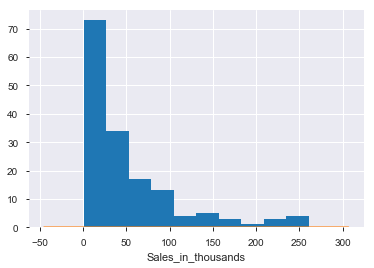

In [35]:
#checking assumptions
#Normality
car_sales_new.Sales_in_thousands.hist()

# Distribution of variables
import seaborn as sns
sns.distplot(car_sales_new.Sales_in_thousands)

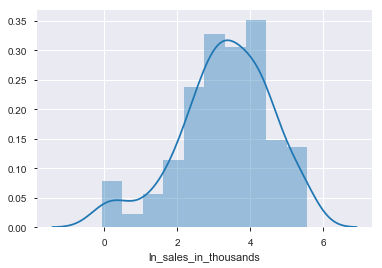

In [36]:
car_sales_new["ln_sales_in_thousands"]= np.log(car_sales_new["Sales_in_thousands"])

import seaborn as sns
sns.distplot(car_sales_new.ln_sales_in_thousands)

In [37]:
#Linearity
# correlation matrix (ranges from 1 to -1)
corrm=car_sales_new.corr()

In [38]:
corrm

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
Sales_in_thousands,1.000000,-0.277375,-0.360085,-0.014355,-0.259332,0.278261,0.092996,0.201007,-0.035062,0.044389,...,0.036853,-0.114192,-0.079886,-0.054683,-0.021816,0.133404,-0.056294,-0.133361,-0.230252,0.799513
four_year_resale_value,-0.277375,1.000000,0.793482,0.433034,0.650285,-0.040888,0.165259,0.040030,0.276207,0.268711,...,-0.065511,0.517804,-0.033931,-0.097963,-0.033931,-0.018848,-0.056776,-0.059543,0.084599,-0.446756
Price_in_thousands,-0.360085,0.793482,1.000000,0.617601,0.847967,0.118272,0.328579,0.157225,0.526211,0.431413,...,-0.061809,0.352504,0.019062,-0.169161,-0.047888,-0.093559,-0.136904,0.052376,0.044229,-0.577814
Engine_size,-0.014355,0.433034,0.617601,1.000000,0.814995,0.518433,0.702596,0.576364,0.793321,0.698313,...,0.078343,0.016720,-0.104716,-0.191354,-0.063982,-0.108018,-0.221204,-0.153125,-0.278720,-0.121158
Horsepower,-0.259332,0.650285,0.847967,0.814995,1.000000,0.325276,0.538193,0.420399,0.637164,0.526638,...,-0.001035,0.231530,-0.016823,-0.226951,-0.043878,-0.115615,-0.244750,-0.011797,-0.010312,-0.401010
Wheelbase,0.278261,-0.040888,0.118272,0.518433,0.325276,1.000000,0.681390,0.837535,0.656884,0.659692,...,0.046376,-0.260791,-0.045175,-0.083439,-0.092140,-0.093985,-0.203574,-0.085580,-0.382446,0.269998
Width,0.092996,0.165259,0.328579,0.702596,0.538193,0.681390,1.000000,0.700024,0.710129,0.648637,...,0.042466,-0.060717,-0.073017,-0.200565,-0.110105,-0.115409,-0.187300,-0.094605,-0.239476,0.037676
Length,0.201007,0.040030,0.157225,0.576364,0.420399,0.837535,0.700024,1.000000,0.622352,0.561758,...,0.096536,-0.149922,-0.014260,-0.061445,-0.059569,-0.103678,-0.304586,-0.059173,-0.130166,0.207373
Curb_weight,-0.035062,0.276207,0.526211,0.793321,0.637164,0.656884,0.710129,0.622352,1.000000,0.868023,...,0.007816,-0.094518,-0.044951,-0.221330,-0.020049,-0.070576,-0.161803,-0.030435,-0.518975,-0.051945
Fuel_capacity,0.044389,0.268711,0.431413,0.698313,0.526638,0.659692,0.648637,0.561758,0.868023,1.000000,...,-0.001399,-0.034685,-0.007281,-0.260082,-0.046183,-0.011476,-0.170318,-0.005775,-0.592574,-0.020221


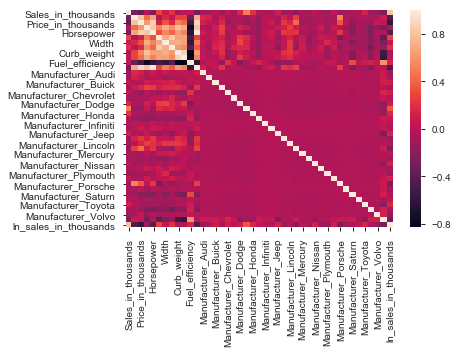

In [39]:
corrm.to_csv('corrm.csv')

# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(car_sales_new.corr())

In [40]:
#Dropping the variables based low correlation with Y
car_sales_new.drop(['Curb_weight','Fuel_capacity','Manufacturer_BMW','Manufacturer_Buick','Manufacturer_Cadillac','Manufacturer_Chevrolet','Manufacturer_Chrysler','Manufacturer_Hyundai','Manufacturer_Infiniti','Manufacturer_Jaguar','Manufacturer_Lincoln','Manufacturer_Mercury','Manufacturer_Oldsmobile','Manufacturer_Pontiac','Manufacturer_Saab','Manufacturer_Saturn','Manufacturer_Subaru','Manufacturer_Volkswagen'], axis=1, inplace=True)
car_sales_new

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Fuel_efficiency,Power_perf_factor,...,Manufacturer_Lexus,Manufacturer_Mercedes-B,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
0,16.919,16.360,21.50000,1.800,140.00,101.2,67.300,172.400,28.0,58.280150,...,0,0,0,0,0,0,0,0,1,2.828437
1,39.384,19.875,28.40000,3.200,225.00,108.1,70.300,192.900,25.0,91.370778,...,0,0,0,0,0,0,0,0,1,3.673360
2,14.114,18.225,22.79900,3.200,225.00,106.9,70.600,192.000,26.0,72.030917,...,0,0,0,0,0,0,0,0,1,2.647167
3,8.588,29.725,42.00000,3.500,210.00,114.6,71.400,196.600,22.0,91.389779,...,0,0,0,0,0,0,0,0,1,2.150366
4,20.397,22.255,23.99000,1.800,150.00,102.6,68.200,178.000,27.0,62.777639,...,0,0,0,0,0,0,0,0,1,3.015388
5,18.780,23.555,33.95000,2.800,200.00,108.7,76.100,192.000,22.0,84.565105,...,0,0,0,0,0,0,0,0,1,2.932792
6,1.380,39.000,62.00000,4.200,310.00,113.0,74.000,198.200,21.0,134.656858,...,0,0,0,0,0,0,0,0,1,0.322083
7,19.747,14.180,26.99000,2.500,170.00,107.3,68.400,176.000,26.0,71.191207,...,0,0,0,0,0,0,0,0,1,2.983002
8,9.231,28.675,33.40000,2.800,193.00,107.3,68.500,176.000,24.0,81.877069,...,0,0,0,0,0,0,0,0,1,2.222567
9,17.527,36.125,38.90000,2.800,193.00,111.4,70.900,188.000,25.0,83.998724,...,0,0,0,0,0,0,0,0,1,2.863743


In [41]:
#Dropping variables with less variance in the data
car_sales_new.drop(['Wheelbase', 'Length', 'Width'], axis=1, inplace=True)

In [42]:
#Splitting the data
feature_columns = car_sales_new.columns.difference( ['ln_sales_in_thousands', 'Sales_in_thousands'] )
feature_columns

Index(['Engine_size', 'Fuel_efficiency', 'Horsepower', 'Manufacturer_Audi',
       'Manufacturer_Dodge', 'Manufacturer_Ford', 'Manufacturer_Honda',
       'Manufacturer_Jeep', 'Manufacturer_Lexus', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Plymouth', 'Manufacturer_Porsche', 'Manufacturer_Toyota',
       'Manufacturer_Volvo', 'Power_perf_factor', 'Price_in_thousands',
       'Vehicle_type_Passenger', 'four_year_resale_value'],
      dtype='object')

In [43]:
#This will be used in sklearn related functions
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( car_sales_new[feature_columns],
                                                  car_sales_new['ln_sales_in_thousands'],
                                                  test_size = 0.3,
                                                  random_state = 1234 )

In [44]:
print(len( train_X ))
print(len( test_X))

109
48


In [46]:
from sklearn.model_selection import train_test_split

train, test = train_test_split( car_sales_new,test_size = 0.3,random_state = 1234 )

In [48]:
print(len(train))
print(len(test))

109
48


In [49]:
# Building Regression Model
import statsmodels.formula.api as smf

In [50]:
lm=smf.ols('ln_sales_in_thousands~Price_in_thousands+four_year_resale_value+Engine_size+Horsepower+Fuel_efficiency+Vehicle_type_Passenger', train).fit()

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [51]:
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.461
Model:                               OLS   Adj. R-squared:                  0.429
Method:                    Least Squares   F-statistic:                     14.54
Date:                   Sun, 15 Sep 2019   Prob (F-statistic):           6.27e-12
Time:                           02:05:56   Log-Likelihood:                -138.20
No. Observations:                    109   AIC:                             290.4
Df Residuals:                        102   BIC:                             309.2
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [52]:
lm=smf.ols('ln_sales_in_thousands~Price_in_thousands+Engine_size+Fuel_efficiency+Vehicle_type_Passenger', train).fit()
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.457
Model:                               OLS   Adj. R-squared:                  0.436
Method:                    Least Squares   F-statistic:                     21.89
Date:                   Sun, 15 Sep 2019   Prob (F-statistic):           3.99e-13
Time:                           02:07:02   Log-Likelihood:                -138.60
No. Observations:                    109   AIC:                             287.2
Df Residuals:                        104   BIC:                             300.6
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Mathematical equation:
ln_sales_in_thousands = 1.9043 - 0.0631 * Price_in_thousands + 0.5813* Engine_size + 0.0816*Fuel_efficiency - Vehicle_type_Passenger*0.7356

sales_in_thousands = exp(ln_sales_in_thousands)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices('ln_sales_in_thousands~Engine_size+Manufacturer_Ford+Manufacturer_Plymouth+Manufacturer_Toyota+four_year_resale_value', train, return_type='dataframe')



# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,12.6,Intercept
1,1.3,Engine_size
2,1.0,Manufacturer_Ford
3,1.0,Manufacturer_Plymouth
4,1.0,Manufacturer_Toyota
5,1.3,four_year_resale_value


#### Predict the Y (Scoring the train & test and validate the results)

In [54]:
train['pred_sales'] = np.exp(lm.predict(train))-1
train.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency,Power_perf_factor,Manufacturer_Audi,Manufacturer_Dodge,Manufacturer_Ford,...,Manufacturer_Mercedes-B,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales
24,17.947,36.225,45.7050,5.7,325.75,22.0,141.119461,0,0,0,...,0,0,0,0,0,0,0,1,2.887423,26.087441
99,0.954,14.180,78.4798,5.0,302.00,20.0,141.100985,0,0,0,...,1,0,0,0,0,0,0,1,-0.047092,0.534543
8,9.231,28.675,33.4000,2.8,193.00,24.0,81.877069,0,0,0,...,0,0,0,0,0,0,0,1,2.222567,11.333779
20,135.126,11.225,16.5350,3.1,170.00,25.0,67.314462,0,0,0,...,0,0,0,0,0,0,0,1,4.906208,50.903983
22,42.593,11.525,19.3900,3.4,180.00,27.0,72.030917,0,0,0,...,0,0,0,0,0,0,0,1,3.751690,60.455166


In [55]:
test['pred_sales'] = np.exp(lm.predict(test))-1
test.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency,Power_perf_factor,Manufacturer_Audi,Manufacturer_Dodge,Manufacturer_Ford,...,Manufacturer_Mercedes-B,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales
58,230.902,13.210,15.350,2.3,135.0,27.0,54.269548,0,0,0,...,0,0,0,0,0,0,0,1,5.441993,39.821158
91,20.380,14.795,22.510,3.3,170.0,21.0,69.671461,0,0,0,...,0,0,0,0,0,0,0,0,3.014554,59.573656
98,11.592,14.180,41.600,3.2,215.0,26.0,92.925792,0,0,0,...,1,0,0,0,0,0,0,1,2.450315,9.760443
29,32.775,14.180,24.495,2.5,168.0,24.0,69.521355,0,0,0,...,0,0,0,0,0,0,0,1,3.489666,17.873990
6,1.380,39.000,62.000,4.2,310.0,21.0,134.656858,1,0,0,...,0,0,0,0,0,0,0,1,0.322083,2.163361


In [56]:
#Accuracy Metrics
MAPE_train = np.mean(np.abs(train['Sales_in_thousands'] - train['pred_sales'])/train['Sales_in_thousands'])
print(MAPE_train)
MAPE_test = np.mean(np.abs(test['Sales_in_thousands'] - test['pred_sales'])/test['Sales_in_thousands'])
print(MAPE_test)

0.9567647256511025
1.5745456340260053


In [57]:
np.corrcoef(train['Sales_in_thousands'],  train['pred_sales'])

array([[1.        , 0.49213482],
       [0.49213482, 1.        ]])

In [58]:
corr_train = np.corrcoef(train['Sales_in_thousands'],  train['pred_sales'])[1][[0]]
corr_test = np.corrcoef(test['Sales_in_thousands'],  test['pred_sales'])[1][[0]]
print(corr_train); print(corr_test)

[0.49213482]
[0.6143215]


#### Regression with all the variables

In [59]:
train.columns= [var.strip().replace('-', '') for var in train.columns]
train.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_MercedesB', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Plymouth', 'Manufacturer_Porsche',
       'Manufacturer_Toyota', 'Manufacturer_Volvo', 'Vehicle_type_Passenger',
       'ln_sales_in_thousands', 'pred_sales'],
      dtype='object')

In [60]:
all_columns = "+".join(train.columns.difference( ['ln_sales_in_thousands'] ))
print(all_columns)

Engine_size+Fuel_efficiency+Horsepower+Manufacturer_Audi+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_MercedesB+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Sales_in_thousands+Vehicle_type_Passenger+four_year_resale_value+pred_sales


In [61]:
my_formula = "ln_sales_in_thousands~" + all_columns
print(my_formula)

ln_sales_in_thousands~Engine_size+Fuel_efficiency+Horsepower+Manufacturer_Audi+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_MercedesB+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Sales_in_thousands+Vehicle_type_Passenger+four_year_resale_value+pred_sales


In [62]:
model2 = smf.ols(my_formula, data=train).fit()
print(model2.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.800
Method:                    Least Squares   F-statistic:                     20.69
Date:                   Sun, 15 Sep 2019   Prob (F-statistic):           1.60e-25
Time:                           02:11:51   Log-Likelihood:                -71.627
No. Observations:                    109   AIC:                             189.3
Df Residuals:                         86   BIC:                             251.2
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### Feature Selection based on importance using F-Regression

In [63]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
features = train_X
target = train_y
F_values, p_values  = f_regression(features, target )

In [65]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [66]:
f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value = pd.to_numeric(f_reg_results.P_Value)

In [67]:
f_reg_results_new=f_reg_results[f_reg_results.P_Value<=0.2]
f_reg_results_new

,Variable,F_Value,P_Value
2,Horsepower,13.645173,0.000
5,Manufacturer_Ford,24.576637,0.000
7,Manufacturer_Jeep,2.909748,0.091
8,Manufacturer_Lexus,2.530412,0.115
9,Manufacturer_Mercedes-B,9.410206,0.003
12,Manufacturer_Plymouth,5.448305,0.021
14,Manufacturer_Toyota,5.983694,0.016
15,Manufacturer_Volvo,5.172131,0.025
16,Power_perf_factor,18.001283,0.000
17,Price_in_thousands,41.999471,0.000


In [68]:
my_formula = 'ln_sales_in_thousands~Engine_size+Manufacturer_Ford+Manufacturer_Plymouth+Manufacturer_Toyota+Price_in_thousands'

In [69]:
lm = smf.ols(my_formula, data=train).fit()
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.570
Model:                               OLS   Adj. R-squared:                  0.549
Method:                    Least Squares   F-statistic:                     27.27
Date:                   Sun, 15 Sep 2019   Prob (F-statistic):           1.75e-17
Time:                           02:14:37   Log-Likelihood:                -125.93
No. Observations:                    109   AIC:                             263.9
Df Residuals:                        103   BIC:                             280.0
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [70]:
lm.predict(train)

24     3.176570
99     0.536722
8      2.609691
20     3.938429
22     3.886288
         ...   
152    2.796573
116    2.206707
53     4.965563
38     3.323346
47     5.349136
Length: 109, dtype: float64

In [71]:
train['pred_ln_sales'] = lm.predict(train)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
train.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency,Power_perf_factor,Manufacturer_Audi,Manufacturer_Dodge,Manufacturer_Ford,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales,pred_ln_sales
24,17.947,36.225,45.7050,5.7,325.75,22.0,141.119461,0,0,0,...,0,0,0,0,0,0,1,2.887423,26.087441,3.176570
99,0.954,14.180,78.4798,5.0,302.00,20.0,141.100985,0,0,0,...,0,0,0,0,0,0,1,-0.047092,0.534543,0.536722
8,9.231,28.675,33.4000,2.8,193.00,24.0,81.877069,0,0,0,...,0,0,0,0,0,0,1,2.222567,11.333779,2.609691
20,135.126,11.225,16.5350,3.1,170.00,25.0,67.314462,0,0,0,...,0,0,0,0,0,0,1,4.906208,50.903983,3.938429
22,42.593,11.525,19.3900,3.4,180.00,27.0,72.030917,0,0,0,...,0,0,0,0,0,0,1,3.751690,60.455166,3.886288


In [73]:
test['pred_ln_sales']  = lm.predict(test)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
test.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency,Power_perf_factor,Manufacturer_Audi,Manufacturer_Dodge,Manufacturer_Ford,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales,pred_ln_sales
58,230.902,13.210,15.350,2.3,135.0,27.0,54.269548,0,0,0,...,0,0,0,0,0,0,1,5.441993,39.821158,3.627331
91,20.380,14.795,22.510,3.3,170.0,21.0,69.671461,0,0,0,...,0,0,0,0,0,0,0,3.014554,59.573656,3.618553
98,11.592,14.180,41.600,3.2,215.0,26.0,92.925792,0,0,0,...,0,0,0,0,0,0,1,2.450315,9.760443,2.232530
29,32.775,14.180,24.495,2.5,168.0,24.0,69.521355,0,0,0,...,0,0,0,0,0,0,1,3.489666,17.873990,3.085478
6,1.380,39.000,62.000,4.2,310.0,21.0,134.656858,1,0,0,...,0,0,0,0,0,0,1,0.322083,2.163361,1.296631


In [75]:
train['actual_sales'] = np.exp(train.ln_sales_in_thousands)
test['actual_sales'] = np.exp(test.ln_sales_in_thousands)

train['pred_sales'] = np.exp(train.pred_ln_sales)
test['pred_sales'] = np.exp(test.pred_ln_sales)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [76]:
train.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency,Power_perf_factor,Manufacturer_Audi,Manufacturer_Dodge,Manufacturer_Ford,...,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales,pred_ln_sales,actual_sales
24,17.947,36.225,45.7050,5.7,325.75,22.0,141.119461,0,0,0,...,0,0,0,0,0,1,2.887423,23.964414,3.176570,17.947
99,0.954,14.180,78.4798,5.0,302.00,20.0,141.100985,0,0,0,...,0,0,0,0,0,1,-0.047092,1.710390,0.536722,0.954
8,9.231,28.675,33.4000,2.8,193.00,24.0,81.877069,0,0,0,...,0,0,0,0,0,1,2.222567,13.594851,2.609691,9.231
20,135.126,11.225,16.5350,3.1,170.00,25.0,67.314462,0,0,0,...,0,0,0,0,0,1,4.906208,51.337888,3.938429,135.126
22,42.593,11.525,19.3900,3.4,180.00,27.0,72.030917,0,0,0,...,0,0,0,0,0,1,3.751690,48.729689,3.886288,42.593


In [77]:
test.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency,Power_perf_factor,Manufacturer_Audi,Manufacturer_Dodge,Manufacturer_Ford,...,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales,pred_ln_sales,actual_sales
58,230.902,13.210,15.350,2.3,135.0,27.0,54.269548,0,0,0,...,0,0,0,0,0,1,5.441993,37.612305,3.627331,230.902
91,20.380,14.795,22.510,3.3,170.0,21.0,69.671461,0,0,0,...,0,0,0,0,0,0,3.014554,37.283587,3.618553,20.380
98,11.592,14.180,41.600,3.2,215.0,26.0,92.925792,0,0,0,...,0,0,0,0,0,1,2.450315,9.323428,2.232530,11.592
29,32.775,14.180,24.495,2.5,168.0,24.0,69.521355,0,0,0,...,0,0,0,0,0,1,3.489666,21.877932,3.085478,32.775
6,1.380,39.000,62.000,4.2,310.0,21.0,134.656858,1,0,0,...,0,0,0,0,0,1,0.322083,3.656956,1.296631,1.380


In [78]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
import scipy.stats as stats

In [79]:
#Train Data
MAPE_train = np.mean(np.abs(train.actual_sales - train.pred_sales)/train.actual_sales )
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(train.actual_sales , train.pred_sales)
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.actual_sales , train.pred_sales)
print(Corr_train)


#Test Data
MAPE_test = np.mean(np.abs(test.actual_sales - test.pred_sales)/test.actual_sales )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.actual_sales , test.pred_sales)
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.actual_sales , test.pred_sales)
print(Corr_test)

0.9015978808355707
1615.5407305058407
(0.7433281166373245, 2.1252279960073727e-20)
1.802261913719162
3914.537072942248
(0.3046385041563135, 0.03526607240584838)


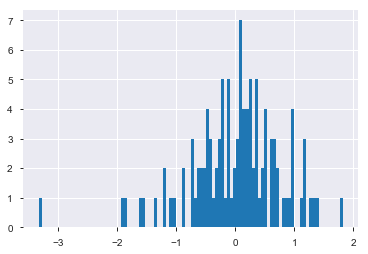

In [81]:
#Residuals Diagnostics
lm.resid.hist(bins=100)

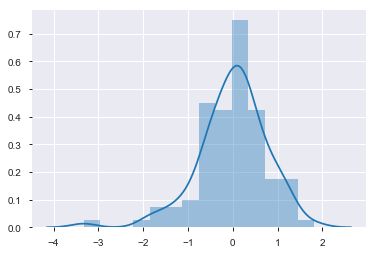

In [82]:
sns.distplot(lm.resid)

In [83]:
stats.pearsonr(train.ln_sales_in_thousands, lm.resid)

(0.6559870920739828, 9.783787199761165e-15)

### Decile Analysis for Linear Regression

In [84]:
train.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_MercedesB', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Plymouth', 'Manufacturer_Porsche',
       'Manufacturer_Toyota', 'Manufacturer_Volvo', 'Vehicle_type_Passenger',
       'ln_sales_in_thousands', 'pred_sales', 'pred_ln_sales', 'actual_sales'],
      dtype='object')

In [85]:
### Decile Analysis
#Decile analysis for validation of models - Business validation

train['Deciles']=pd.qcut(train['pred_sales'],10, labels=False)
test['Deciles']=pd.qcut(test['pred_sales'],10, labels=False)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [86]:
# Decile Analysis for train data
Predicted_avg = train[['Deciles','pred_sales']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred_sales']
Actual_avg = train[['Deciles','Sales_in_thousands']].groupby(train.Deciles).mean().sort_index(ascending=False)['Sales_in_thousands']

Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_train

,pred_sales,Sales_in_thousands
Deciles,,
9,155.144270,163.140876
8,62.617933,88.879545
7,42.037246,58.382909
6,35.309275,44.291727
5,31.610698,31.409900
4,28.468390,42.877298
3,24.267186,35.324091
2,18.609284,22.689636
1,13.192045,18.478182


In [87]:
# Decile Analysis for train data
Predicted_avg = test[['Deciles','pred_sales']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred_sales']
Actual_avg = test[['Deciles','Sales_in_thousands']].groupby(test.Deciles).mean().sort_index(ascending=False)['Sales_in_thousands']

In [88]:
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_test

,pred_sales,Sales_in_thousands
Deciles,,
9,149.381968,96.381600
8,50.161220,68.033000
7,38.874938,86.924400
6,35.440255,41.334750
5,31.653931,84.259200
4,27.489237,43.486000
3,22.001389,32.559250
2,15.482482,26.987000
1,6.777731,13.062600


In [89]:
Decile_analysis_train.to_csv('Decile_analysis_train.csv')

Decile_analysis_test.to_csv('Decile_analysis_test.csv')

### USING sklearn Library to build the model

In [90]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit( train_X, train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
linreg.coef_

array([ 0.3629954 ,  0.07583082, -0.01033786,  0.39212037,  0.30814558,
        1.48275637, -0.85073856,  0.78405729,  0.10401663,  0.28706069,
       -0.36324242,  0.56475717, -1.21457757,  0.24879907,  0.67980742,
       -0.0945945 ,  0.04515353, -0.09482092, -0.58856812,  0.00719481])

In [92]:
linreg.score(train_X, train_y)

0.633653528690667

In [93]:
y_pred_t = linreg.predict(train_X)
y_pred_t

array([3.6226703 , 0.48231638, 2.53144405, 3.76999671, 3.87158765,
       1.96918489, 3.55324251, 3.06143692, 3.36590711, 3.00030301,
       3.68680219, 3.72071862, 2.23516134, 2.47372121, 4.47836057,
       3.06733522, 3.61362399, 4.54425019, 3.26112622, 3.60269884,
       3.48597864, 4.79627583, 4.83816119, 3.60929388, 3.84773165,
       2.99395939, 3.15401047, 3.6835875 , 4.84234531, 3.19420135,
       3.19357795, 5.5004017 , 3.21625713, 3.7961093 , 3.38608331,
       3.99421646, 2.64766967, 3.12622036, 0.84231669, 2.73192317,
       4.20628072, 2.83298693, 1.37498575, 4.06582285, 3.60918646,
       3.15089579, 2.77659146, 4.94204338, 2.21385188, 2.3951127 ,
       3.60320674, 4.44967451, 3.33716556, 3.86635099, 2.86478563,
       5.3769952 , 2.35721444, 3.89721887, 3.01008378, 3.98711812,
       2.65813826, 3.75422283, 3.30981542, 4.19390772, 0.75139678,
       3.67496107, 2.6592537 , 3.02382213, 2.23588454, 2.57434471,
       3.36631544, 3.50222795, 2.93544564, 3.18223075, 5.19996

In [94]:
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print(rmse_t)
print(metrics.r2_score( train_y, y_pred_t ))

0.7088465949957898
0.633653528690667


In [95]:
y_pred = linreg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred ) )
print(rmse)
print(metrics.r2_score( test_y, y_pred ))

1.1658376715131706
0.33021412498246816


In [96]:
residuals = train_y - y_pred_t

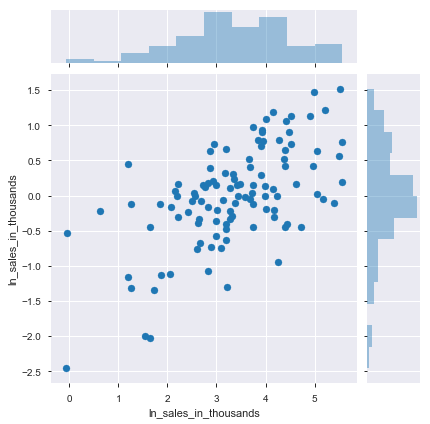

In [97]:
sns.jointplot(  train_y, residuals )

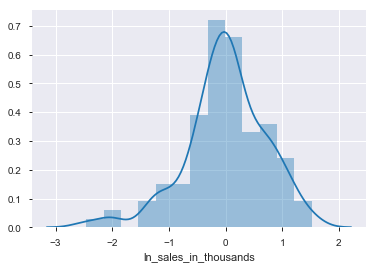

In [98]:
sns.distplot( residuals )

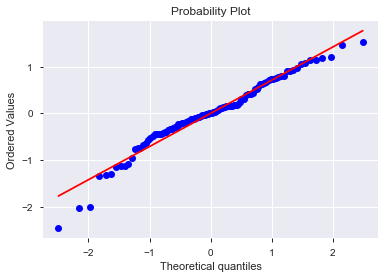

In [99]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct

In [101]:
### K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score

In [102]:
linreg = LinearRegression()

In [103]:
cross_val_score( linreg, train_X, train_y, scoring = 'r2', cv = 10 )

array([ 0.15817974,  0.59638468,  0.70514214,  0.6620212 ,  0.38069001,
        0.53417905,  0.21978841, -0.82541714,  0.49723757,  0.51248866])

In [104]:
round( np.mean( cross_val_score( linreg,
                              train_X,
                              train_y,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

0.34